In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score

In [7]:
df = pd.read_csv('DelayedFlights.csv')

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
#elimino la columna contador de filas Unnamed: 0
df = df.drop('Unnamed: 0', 1)


In [11]:
df.describe().round(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.000,1936758.000,1936758.000,1936758.000,1936758.000,1929648.000,1936758.000,1936758.000,1928371.000,1936560.000,1928371.000,1928371.000,1936758.000,1936758.000,1929648.000,1936303.000,1936758.000,1936758.000,1247488.000,1247488.000,1247488.000,1247488.000,1247488.000
mean,2008.0,6.111,15.753,3.985,1518.534,1467.473,1610.141,1634.225,2184.263,133.306,134.303,108.277,42.200,43.185,765.686,6.813,18.232,0.000,0.004,19.179,3.704,15.022,0.090,25.296
std,0.0,3.483,8.776,1.996,450.485,424.767,548.178,464.635,1944.702,72.060,71.341,68.643,56.785,53.403,574.480,5.274,14.339,0.018,0.063,43.546,21.493,33.833,2.023,42.055
min,2008.0,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,14.000,-25.000,0.000,-109.000,6.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2008.0,3.000,8.000,2.000,1203.000,1135.000,1316.000,1325.000,610.000,80.000,82.000,58.000,9.000,12.000,338.000,4.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2008.0,6.000,16.000,4.000,1545.000,1510.000,1715.000,1705.000,1543.000,116.000,116.000,90.000,24.000,24.000,606.000,6.000,14.000,0.000,0.000,2.000,0.000,2.000,0.000,8.000
75%,2008.0,9.000,23.000,6.000,1900.000,1815.000,2030.000,2014.000,3422.000,165.000,165.000,137.000,56.000,53.000,998.000,8.000,21.000,0.000,0.000,21.000,0.000,15.000,0.000,33.000
max,2008.0,12.000,31.000,7.000,2400.000,2359.000,2400.000,2400.000,9742.000,1114.000,660.000,1091.000,2461.000,2467.000,4962.000,240.000,422.000,1.000,1.000,2436.000,1352.000,1357.000,392.000,1316.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [13]:
#elimino NAN 
dflimpio=df.dropna()

In [14]:
dflimpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247486 entries, 3 to 1936755
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1247486 non-null  int64  
 1   Month              1247486 non-null  int64  
 2   DayofMonth         1247486 non-null  int64  
 3   DayOfWeek          1247486 non-null  int64  
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  int64  
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  int64  
 8   UniqueCarrier      1247486 non-null  object 
 9   FlightNum          1247486 non-null  int64  
 10  TailNum            1247486 non-null  object 
 11  ActualElapsedTime  1247486 non-null  float64
 12  CRSElapsedTime     1247486 non-null  float64
 13  AirTime            1247486 non-null  float64
 14  ArrDelay           1247486 non-null  float64
 15  DepDelay           1247486 non-n

In [15]:
dflimpio2=dflimpio[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [16]:
# Label encoder para variables categoricas
le = LabelEncoder()



In [17]:
dflimpio2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,0,8.0,0.0,0.0,0.0,72.0
9,2008,1,3,4,1452.0,1425,1640.0,1625,WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,0,3.0,0.0,0.0,0.0,12.0
11,2008,1,3,4,1323.0,1255,1526.0,1510,WN,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,0,0.0,0.0,0.0,0.0,16.0


In [18]:
#Codifico las variables categoricas
categoricas=['UniqueCarrier','Origin', 'Dest' ]

In [19]:
for categoria in categoricas:
  dflimpio2[categoria]=le.fit_transform(dflimpio2[categoria])

<ipython-input-19-901b05a54e5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflimpio2[categoria]=le.fit_transform(dflimpio2[categoria])


In [20]:
dflimpio2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,90.0,90.0,77.0,34.0,34.0,140,48,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1937.0,1830,2037.0,1940,17,240.0,250.0,230.0,57.0,67.0,140,155,1591,3.0,7.0,0,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1644.0,1510,1845.0,1725,17,121.0,135.0,107.0,80.0,94.0,140,177,828,6.0,8.0,0,0,8.0,0.0,0.0,0.0,72.0
9,2008,1,3,4,1452.0,1425,1640.0,1625,17,228.0,240.0,213.0,15.0,27.0,140,220,1489,7.0,8.0,0,0,3.0,0.0,0.0,0.0,12.0
11,2008,1,3,4,1323.0,1255,1526.0,1510,17,123.0,135.0,110.0,16.0,28.0,140,284,838,4.0,9.0,0,0,0.0,0.0,0.0,0.0,16.0


In [21]:
#Con standarEscaler estandirizo las variables

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(dflimpio2)

StandardScaler()

In [24]:
dflimpio2SC=scaler.transform(dflimpio2)

In [25]:
dflimpio2SCDF=pd.DataFrame(dflimpio2SC)

In [26]:
dflimpio2SCDF.columns=dflimpio2.columns

In [27]:
dflimpio2SCDF.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,-1.443571,-1.447221,0.009992,0.594652,0.634057,0.586105,0.590254,1.014621,-0.627665,-0.600645,-0.446213,-0.482127,-0.428891,-0.067902,-1.258892,-0.405079,-0.712260,-0.639115,0.0,0.0,-0.394510,-0.172317,-0.443992,-0.044563,0.159399
1,0.0,-1.443571,-1.447221,0.009992,0.832365,0.812129,0.719680,0.622740,1.014621,1.447129,1.700454,1.798028,-0.103550,0.122314,-0.067902,0.070285,1.518534,-0.712260,-0.818973,0.0,0.0,-0.210797,-0.172317,-0.443992,-0.044563,0.516076
2,0.0,-1.443571,-1.447221,0.009992,0.187459,0.052355,0.390880,0.157107,1.014621,-0.198874,0.046539,-0.006165,0.275028,0.573300,-0.067902,0.343574,0.154485,-0.215014,-0.759021,0.0,0.0,-0.256726,-0.172317,-0.443992,-0.044563,1.110537
3,0.0,-1.443571,-1.447221,0.009992,-0.235142,-0.149460,0.039818,-0.059466,1.014621,1.281145,1.556635,1.548668,-0.794865,-0.545814,-0.067902,0.877729,1.336184,-0.049266,-0.759021,0.0,0.0,-0.371546,-0.172317,-0.443992,-0.044563,-0.316170
4,0.0,-1.443571,-1.447221,0.009992,-0.519076,-0.553089,-0.155408,-0.308526,1.014621,-0.171210,0.046539,0.037839,-0.778405,-0.529111,-0.067902,1.672751,0.172362,-0.546511,-0.699068,0.0,0.0,-0.440438,-0.172317,-0.443992,-0.044563,-0.221056


In [28]:
pca = PCA(n_components=7)
componentesprincipales = pca.fit_transform(dflimpio2SCDF)

In [29]:
componentesprincipales

array([[-1.52100184,  0.64307348, -1.22691473, ..., -0.10298368,
         0.03296614, -1.799921  ],
       [ 2.67447898,  1.29483584, -1.30848501, ..., -0.59716899,
         0.66781696, -1.60391502],
       [-0.29806816,  0.68641336,  0.15470082, ..., -0.96337662,
         0.26429066, -1.6389372 ],
       ...,
       [ 0.48896544, -1.13601118, -0.43718481, ...,  0.67758525,
        -1.94522786,  0.53547232],
       [-0.12294355, -3.08067727,  2.27115485, ..., -0.00961155,
        -2.12078475,  0.69611747],
       [ 0.67889638, -1.50230027,  1.80767989, ..., -0.08960659,
        -1.03772743,  1.71146384]])

In [30]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}

#La lista tiene valores de SSE (la suma  de errores cuadrados) para cada k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(componentesprincipales)
    sse.append(kmeans.inertia_)

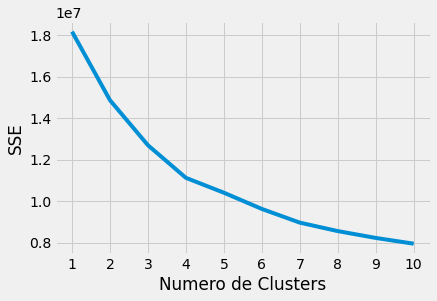

In [31]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero de Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
#Segun la grafica 4 cluster es el valor optimo

In [33]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42).fit(componentesprincipales)
kmeans_pca

KMeans(n_clusters=4, random_state=42)

In [34]:
#Representacion Grafia

In [35]:
labels_pca = kmeans_pca.labels_
dfc=pd.DataFrame(componentesprincipales)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


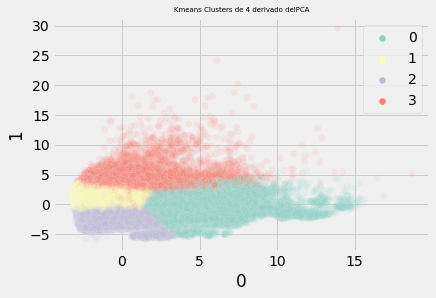

In [36]:
sns.scatterplot(dfc.iloc[:,0], dfc.iloc[:,1],
               hue = kmeans_pca.labels_, palette='Set3', s=50,
               alpha=0.1).set_title('Kmeans Clusters de 4 derivado delPCA',
                                   fontsize=7)

plt.legend()
plt.show()

# Exercici 2

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [37]:
jerarc = dfc.iloc[:,:2]

In [41]:

cluster1, cluster2 = train_test_split(jerarc, test_size = 0.01, random_state=42)

In [42]:
cluster1.shape

(1235011, 2)

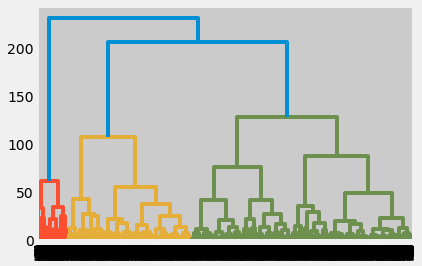

In [45]:
slk = linkage(cluster2, method="ward")
dendrogram(slk)
plt.show()

In [46]:
#En el dendogramma se ve 3 clusters 

# Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [73]:
muestra1, muestra2 = train_test_split(jerarc, test_size = 0.03, random_state=42)
print(muestra1.shape, muestra2.shape)

(1210061, 2) (37425, 2)


In [74]:
silhouette_coefficients = []
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}
#kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 20,"random_state": 42}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(muestra2)
    score = silhouette_score(muestra2, kmeans.labels_)    
    silhouette_coefficients.append(score)
    print("Clusters :", k,"La media de silhouette_score es :", score)



Clusters : 2 La media de silhouette_score es : 0.4248003312275607
Clusters : 3 La media de silhouette_score es : 0.3972709268176994
Clusters : 4 La media de silhouette_score es : 0.37546101491925543
Clusters : 5 La media de silhouette_score es : 0.36286563350482226
Clusters : 6 La media de silhouette_score es : 0.34413698830192785
Clusters : 7 La media de silhouette_score es : 0.3433303631156244
Clusters : 8 La media de silhouette_score es : 0.34171132258394316
Clusters : 9 La media de silhouette_score es : 0.34451207398197525
Clusters : 10 La media de silhouette_score es : 0.34314988398078106
Clusters : 11 La media de silhouette_score es : 0.3256157027537662
Clusters : 12 La media de silhouette_score es : 0.3264791741803732
Clusters : 13 La media de silhouette_score es : 0.3277026150270163
Clusters : 14 La media de silhouette_score es : 0.3286115299836098


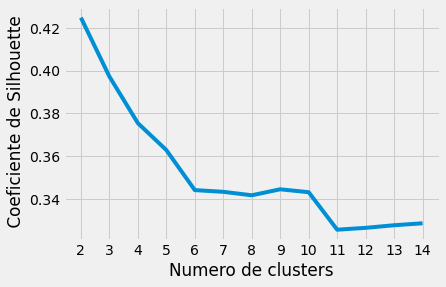

In [75]:
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Numero de clusters")
plt.ylabel(" Coeficiente de Silhouette")
plt.show()